<a href="https://colab.research.google.com/github/Dipankar-Kalra/ML_Kyphosis_Model/blob/main/Machine_Learning_for_Kyphosis_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title IMPORT LIBRARIES AND DATASETS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json

# Ask for Kaggle credentials
print("Please enter your Kaggle credentials:")
kaggle_username = input("Kaggle Username: ")
kaggle_key = input("Kaggle API Key: ")

# Create .kaggle directory and store credentials
!mkdir -p ~/.kaggle
kaggle_credentials = {
    "username": kaggle_username,
    "key": kaggle_key
}

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(kaggle_credentials, file)

# Set appropriate permissions
!chmod 600 ~/.kaggle/kaggle.json

# Install kaggle API if not already installed
!pip install -q kaggle

# Download the dataset
!kaggle datasets download -d abbasit/kyphosis-dataset

# Unzip the dataset
!unzip -q kyphosis-dataset.zip

# Load the dataset
Kyphosis_df = pd.read_csv('kyphosis.csv')

print("Dataset loaded successfully!")
print(Kyphosis_df.head())





Please enter your Kaggle credentials:
Kaggle API Key: 3a1ffd693a1491f177e8983205ac4419
Dataset URL: https://www.kaggle.com/datasets/abbasit/kyphosis-dataset
License(s): CC0-1.0
  0% 0.00/559 [00:00<?, ?B/s]
100% 559/559 [00:00<00:00, 1.75MB/s]
Dataset loaded successfully!
  Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15


In [ ]:
#@title PERFORM DATA VISUALIZATION

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [ ]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [ ]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]
print( 'Presence of Kyphosis after Surgery =', (len(Kyphosis_True) / len(Kyphosis_df) )*100,"%")

<Axes: >

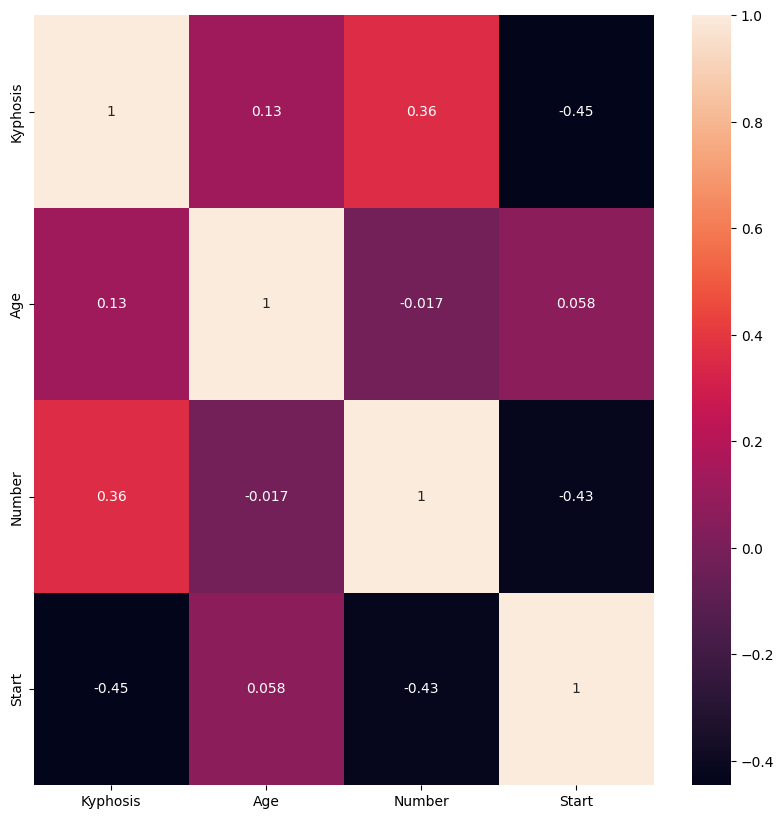

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(Kyphosis_df.corr(), annot = True)

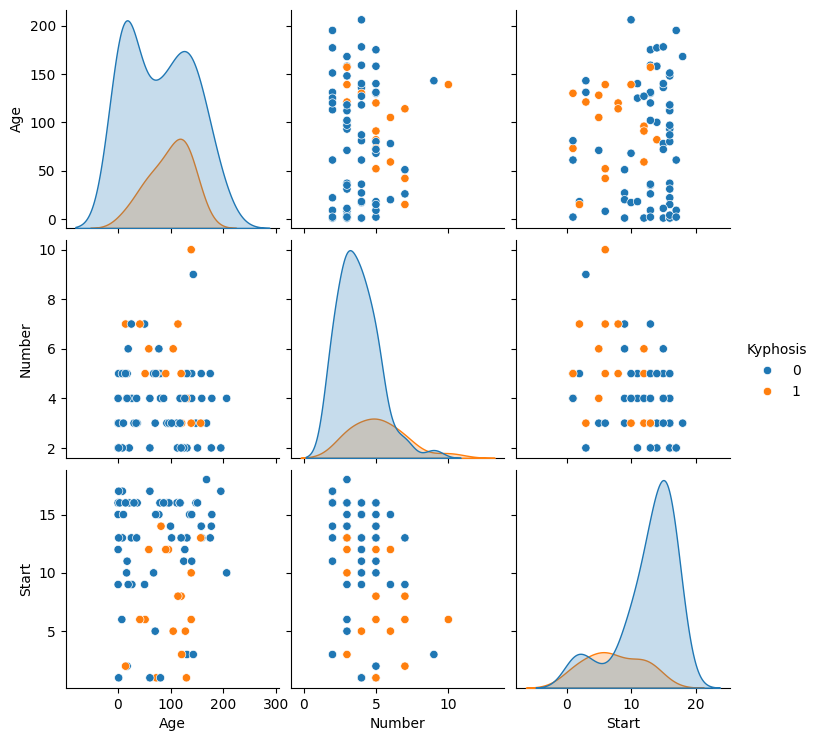

In [ ]:
sns.pairplot(Kyphosis_df, hue = 'Kyphosis')

In [ ]:
#@title DATASET CLEANING AND TRAINING
from sklearn.model_selection import train_test_split

x= Kyphosis_df.drop(['Kyphosis'], axis = 1)
y = Kyphosis_df['Kyphosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
#@title TRAINING LOGISTIC REGRESSION CLASSIFIER MODEL

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)



LogisticRegression()

<Axes: >

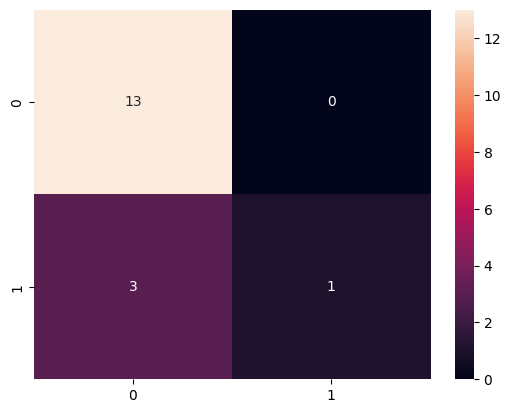

In [ ]:
#@title EVALUATING MODEL

from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = model.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.25      0.40         4

    accuracy                           0.82        17
   macro avg       0.91      0.62      0.65        17
weighted avg       0.86      0.82      0.78        17



In [ ]:
#@title IMPROVING MODEL

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

<Axes: >

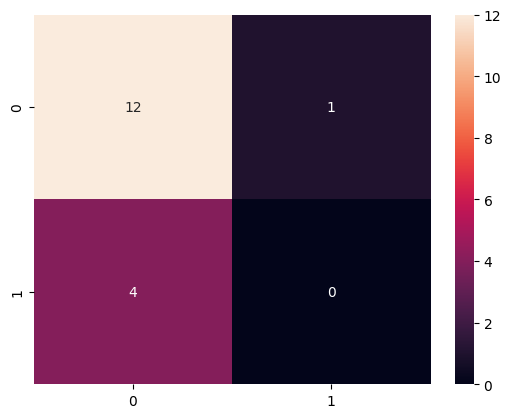

In [ ]:
# @title UNDERSTANDING THE TEST RESULTS
y_predict_test = decision_tree.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.00      0.00      0.00         4

    accuracy                           0.71        17
   macro avg       0.38      0.46      0.41        17
weighted avg       0.57      0.71      0.63        17



In [ ]:


feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

print(feature_importances)

        importance
Age       0.508245
Start     0.293000
Number    0.198755
